# Author: ddukic

In [1]:
import wandb
import pandas as pd
import sys
import json
from statistics import mean, stdev
sys.path.append("../../")
from result_utils import * 
%matplotlib inline

api = wandb.Api()

def fetch_run_summary(run_url):
    try:
        run_key = run_url.split("/")[-1]
        return api.run("ddukic/oee-paper/" + run_key).summary
    except:
        return {}

In [2]:
results_seed_42 = json.load(open("seed_42.json", "r"))
results_seed_43 = json.load(open("seed_43.json", "r"))
results_seed_44 = json.load(open("seed_44.json", "r"))

In [7]:
temp = [[id for _, id in v.items()] for _, v in results_seed_42.items()]
wandb_keys = []

for x in temp:
    for k in x:
        wandb_keys.append(k)

print("all unique:", len(wandb_keys) == len(set(wandb_keys)))

all unique: True


In [8]:
results_check_all_equal = {
    k: {
        setting: extract_name(run_42).replace("SEED=42", "")
        == extract_name(run_43).replace("SEED=43", "")
        == extract_name(run_44).replace("SEED=44", "")
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_check_all_equal

{'0_shot_pretrained_on_source': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 '0_shot_from_roberta': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 '5_shot_from_roberta': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 '10_shot_from_roberta': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 '50_shot_from_roberta': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 '100_shot_from_roberta': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 '250_shot_from_roberta': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 '500_shot_from_roberta': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 'seq_5_shot_pretrained_on_source': {'vanilla': True,
  'implicit_multitask': True,
  'two_head_multitask': True},
 'seq_10_shot_pretrained_on_source': {'vanill

In [3]:
results_target_f1_table_data_mean = {
    k: {
        setting: format(
            round(
                mean(
                    [
                        extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_44), k, "f1"),
                    ]
                ),
                3,
            ),
            ".3f",
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_target_f1_table_data_std = {
    k: {
        setting: format(
            round(
                stdev(
                    [
                        extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                        extract_target_performance(fetch_run_summary(run_44), k, "f1"),
                    ]
                ),
                3,
            ),
            ".3f",
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

results_target_f1_plot_data = {
    k: {
        setting: mean(
            [
                extract_target_performance(fetch_run_summary(run_42), k, "f1"),
                extract_target_performance(fetch_run_summary(run_43), k, "f1"),
                extract_target_performance(fetch_run_summary(run_44), k, "f1"),
            ]
        )
        for (setting, run_42), (_, run_43), (_, run_44) in zip(
            v_42.items(), v_43.items(), v_44.items()
        )
    }
    for (k, v_42), (_, v_43), (_, v_44) in zip(
        results_seed_42.items(), results_seed_43.items(), results_seed_44.items()
    )
}

In [4]:
df_f1 = pd.DataFrame.from_dict(results_target_f1_table_data_mean, orient="index")
print(df_f1.to_latex().replace("llll", "lrrr"))

\begin{tabular}{lrrr}
\toprule
{} & vanilla & implicit\_multitask & two\_head\_multitask \\
\midrule
0\_shot\_pretrained\_on\_source       &   0.396 &              0.405 &              0.389 \\
0\_shot\_from\_roberta               &   0.050 &              0.067 &              0.051 \\
5\_shot\_from\_roberta               &   0.007 &              0.012 &              0.037 \\
10\_shot\_from\_roberta              &   0.002 &              0.000 &              0.003 \\
50\_shot\_from\_roberta              &   0.548 &              0.557 &              0.552 \\
100\_shot\_from\_roberta             &   0.633 &              0.638 &              0.623 \\
250\_shot\_from\_roberta             &   0.661 &              0.661 &              0.650 \\
500\_shot\_from\_roberta             &   0.670 &              0.674 &              0.671 \\
seq\_5\_shot\_pretrained\_on\_source   &   0.469 &              0.480 &              0.468 \\
seq\_10\_shot\_pretrained\_on\_source  &   0.532 &              0.53

/tmp/ipykernel_68336/3229850648.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_f1.to_latex().replace("llll", "lrrr"))


In [6]:
df_f1 = pd.DataFrame.from_dict(results_target_f1_table_data_std, orient="index")
print(df_f1.to_latex().replace("llll", "lrrr"))

\begin{tabular}{lrrr}
\toprule
{} & vanilla & implicit\_multitask & two\_head\_multitask \\
\midrule
0\_shot\_pretrained\_on\_source       &   0.005 &              0.001 &              0.012 \\
0\_shot\_from\_roberta               &   0.054 &              0.052 &              0.045 \\
5\_shot\_from\_roberta               &   0.005 &              0.011 &              0.032 \\
10\_shot\_from\_roberta              &   0.003 &              0.000 &              0.002 \\
50\_shot\_from\_roberta              &   0.008 &              0.010 &              0.022 \\
100\_shot\_from\_roberta             &   0.008 &              0.002 &              0.002 \\
250\_shot\_from\_roberta             &   0.001 &              0.004 &              0.002 \\
500\_shot\_from\_roberta             &   0.002 &              0.002 &              0.001 \\
seq\_5\_shot\_pretrained\_on\_source   &   0.022 &              0.019 &              0.007 \\
seq\_10\_shot\_pretrained\_on\_source  &   0.012 &              0.01

/tmp/ipykernel_68336/524380686.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_f1.to_latex().replace("llll", "lrrr"))


In [7]:
df_f1 = df_f1 = pd.DataFrame.from_dict(results_target_f1_plot_data, orient="index")
df_f1 = transform_df(df_f1)
df_f1.to_csv("mlm.csv", index=False)

/home/ddukic/oee/results/maven_to_ednyt/mlm/../../result_utils.py:101: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(


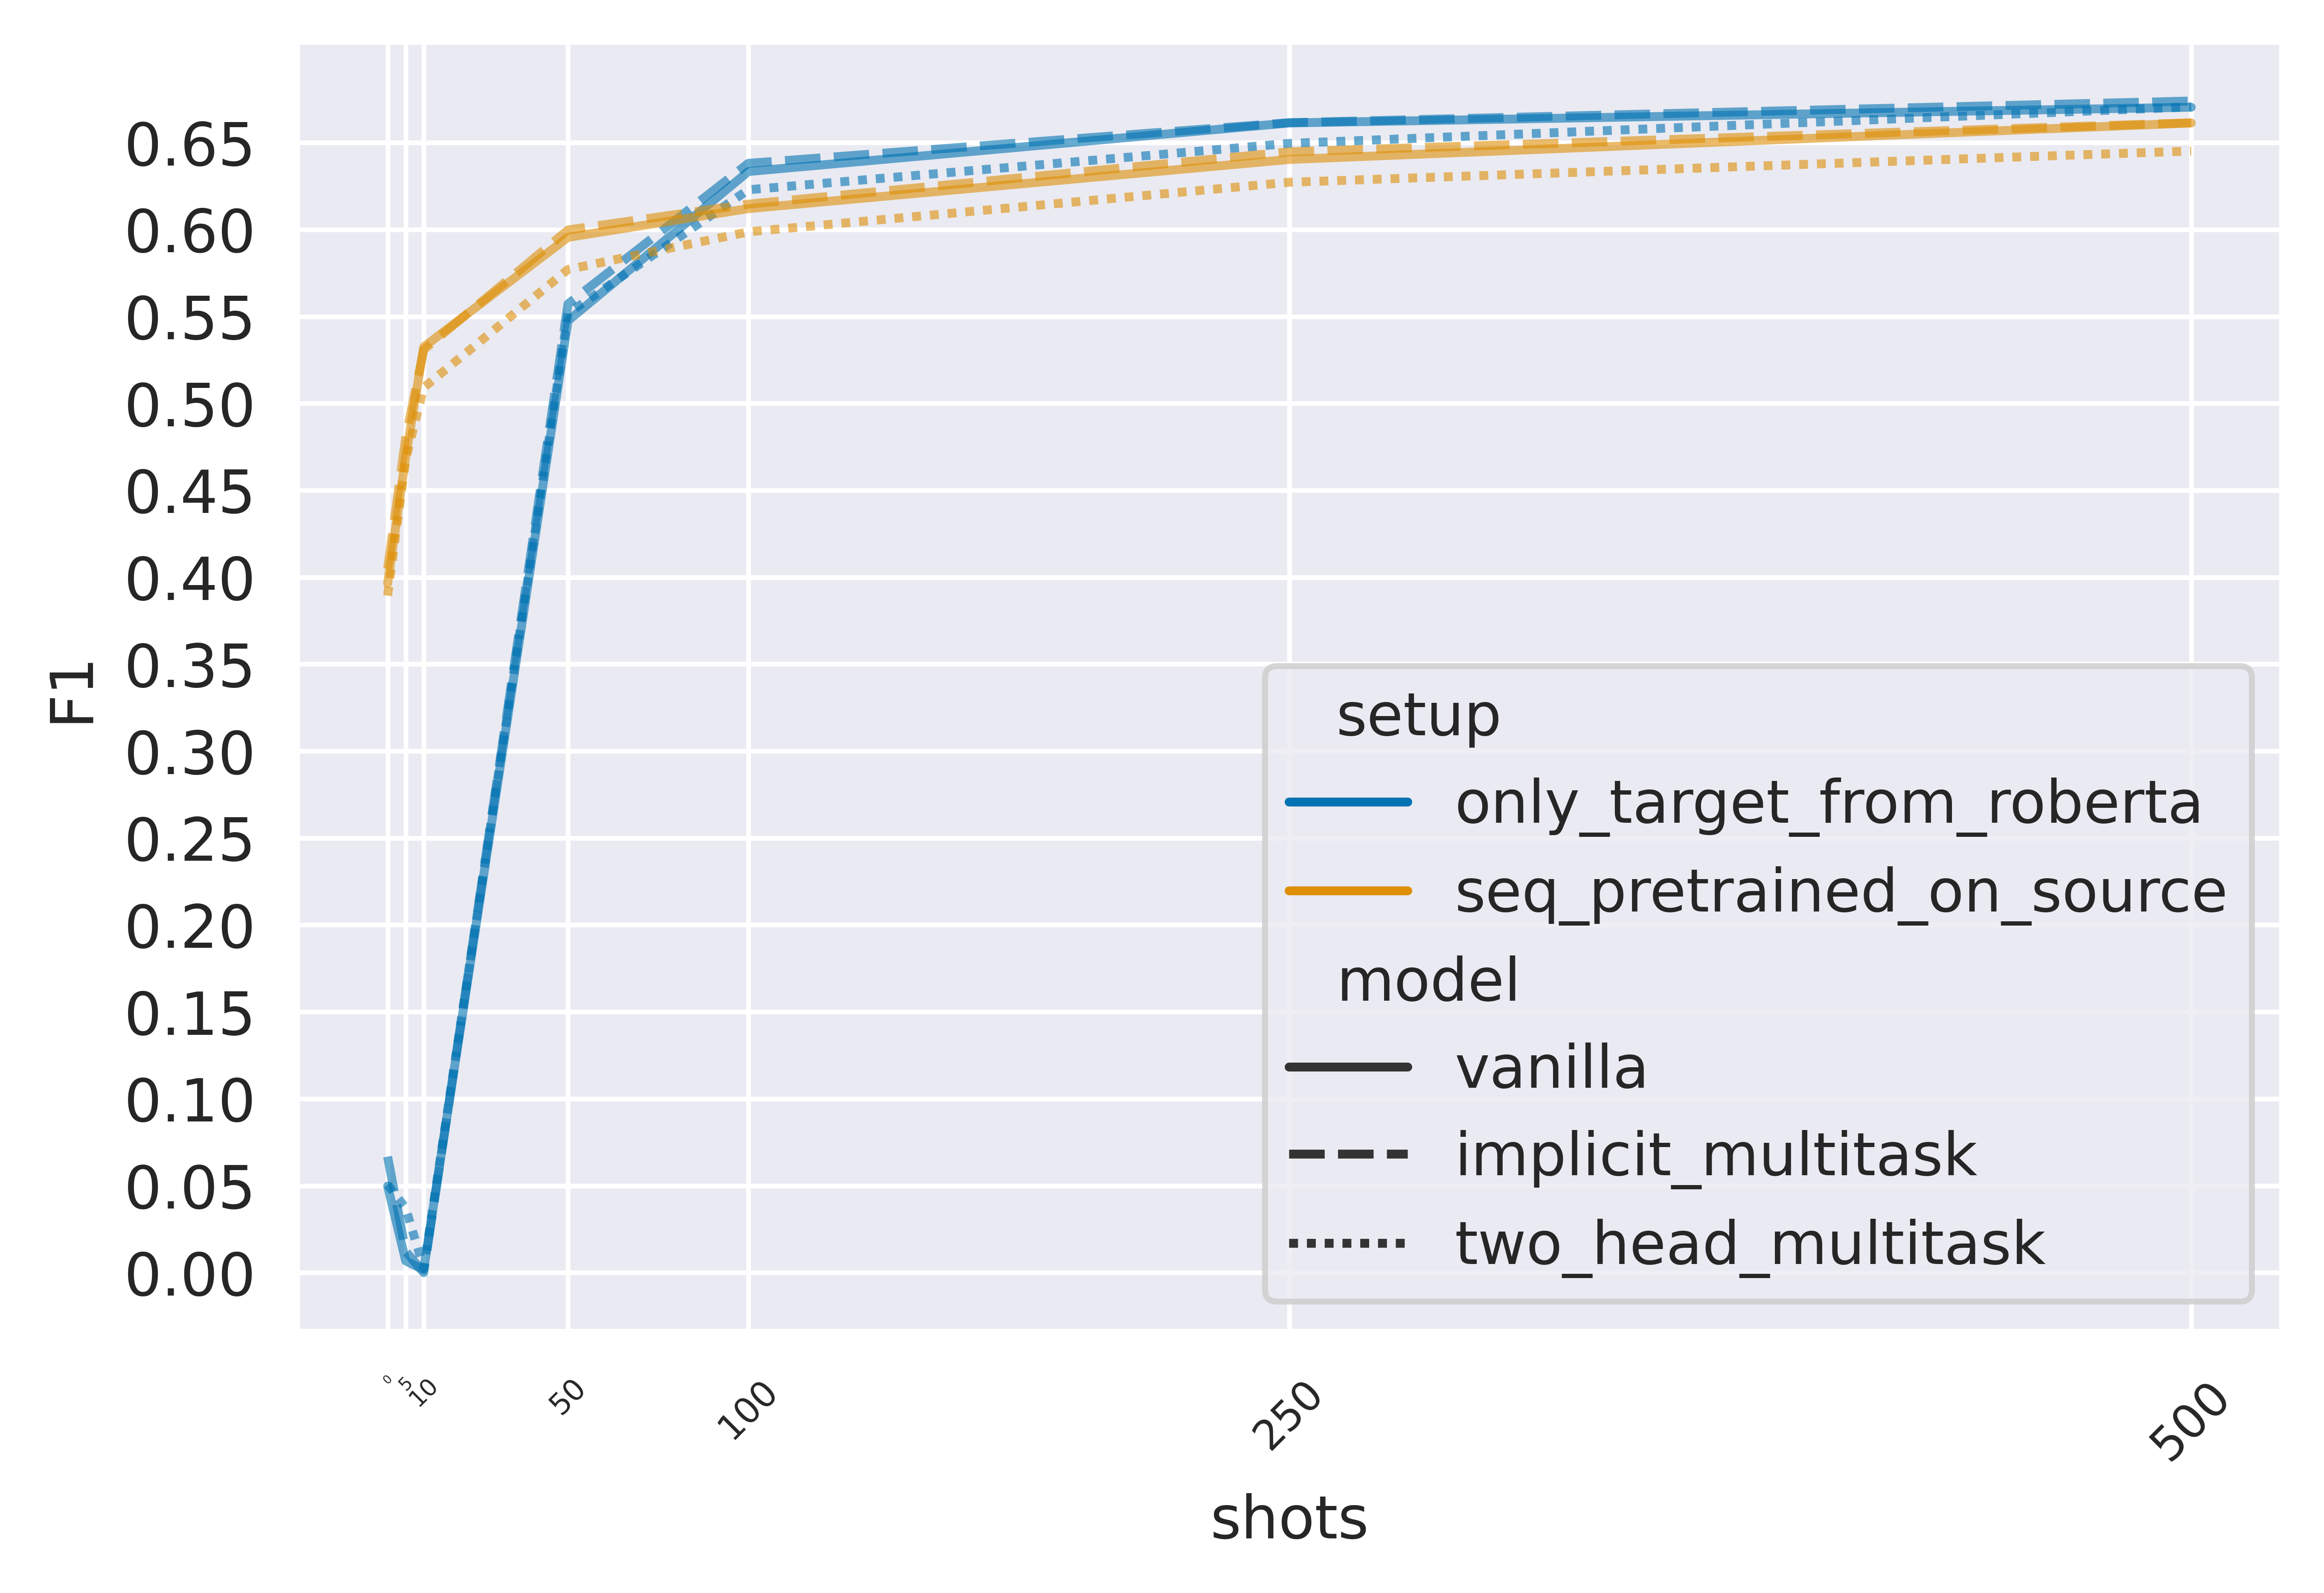

In [11]:
plot_graph(df_f1)